## Assignment 10 Giulia Sora

I've decided to copy paste everything from the previous lesson in order not to lose anything

In [30]:
import pandas as pd           
import numpy as np
import matplotlib.pyplot as plt
import os 

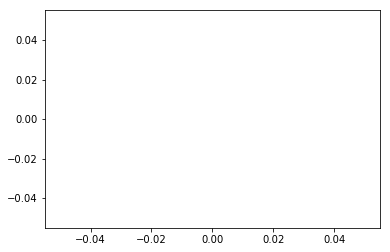

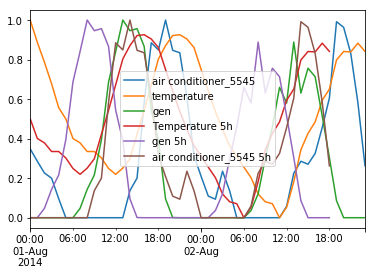

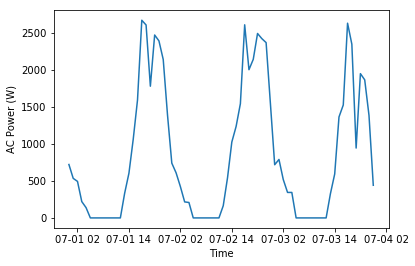

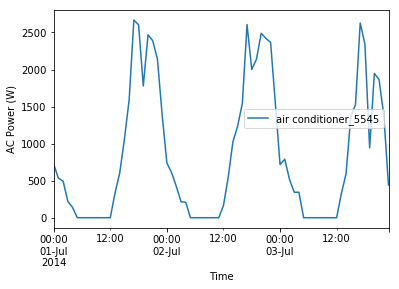

C:\Users\Giulia\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


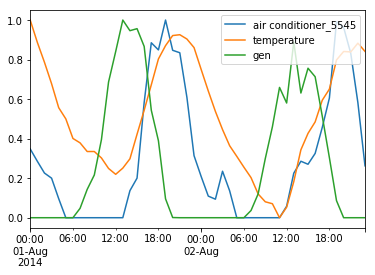

C:\Users\Giulia\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


temperature -1hr
temperature -2hr
temperature -3hr
temperature -4hr
temperature -5hr
temperature -6hr
irradiance -3hr
irradiance -4hr
irradiance -5hr
irradiance -6hr
AC_Consumption -1hr
AC_Consumption -2hr
AC_Consumption -3hr
AC_Consumption -4hr
AC_Consumption -5hr
AC_Consumption -6hr
AC_Consumption -7hr
AC_Consumption -8hr
AC_Consumption -9hr
AC_Consumption -10hr
AC_Consumption -11hr
AC_Consumption -12hr
AC_Consumption -13hr
AC_Consumption -14hr
AC_Consumption -15hr
AC_Consumption -16hr
AC_Consumption -17hr
AC_Consumption -18hr
AC_Consumption -19hr
AC_Consumption -20hr
AC_Consumption -21hr
AC_Consumption -22hr
AC_Consumption -23hr
AC_Consumption -24hr


,WorkingTime,Weekend
2014-01-15 09:00:00,0,0
2014-01-15 10:00:00,0,0


In [32]:
ExternalFilesFolder =  r"C:\Users\Giulia\Desktop\Gitex\Data-driven_Building_simulation_Polimi_EETBS\Data"
ConsumptionFileName= "consumption_5545.csv"
TemperatureFileName= "Austin_weather_2014.csv"
IrradianceFileName= "irradiance_2014_gen.csv"

path_consumptionFile = os.path.join(ExternalFilesFolder,ConsumptionFileName)
path_TemperatureFile = os.path.join(ExternalFilesFolder,TemperatureFileName)
path_IrradianceFile = os.path.join(ExternalFilesFolder,IrradianceFileName)

DF_consumption = pd.read_csv(path_consumptionFile,sep=",", index_col=0)
DF_consumption.head()
DF_consumption.tail(10)

PreviousIndex = DF_consumption.index
NewParsedIndex= pd.to_datetime(PreviousIndex)
DF_consumption.index =NewParsedIndex 

DF_consumption.head()
DF_consumption.index.hour
DF_consumption.index.month
DF_consumption.index.dayofweek     

DF_consumption_someDaysInJuly=DF_consumption["2014-07-01 00:00:00":"2014-07-03 23:00:00"]

plt.figure()
plt.plot(DF_consumption_someDaysInJuly)     
plt.xlabel("Time")
plt.ylabel("AC Power (W)")
plt.show()

# There is a second way of doing this
plt.figure()
DF_consumption_someDaysInJuly.plot()
plt.xlabel("Time")
plt.ylabel("AC Power (W)")
plt.show()                                     

#This is better

# Let's import the weather data 

DF_weather = pd.read_csv(path_TemperatureFile,sep=";",index_col=0)
DF_weather.head(24)
previousIndex_weather=DF_weather.index
newIndex_weather=pd.to_datetime(previousIndex_weather)
DF_weather.index = newIndex_weather
DF_weather.columns
Series_Temperature = DF_weather["temperature"]           
Series_Temperature.head(4)
DF_Temperature= DF_weather[["temperature"]]
DF_Temperature.head()


DF_irradianceSource = pd.read_csv(path_IrradianceFile,sep=";",index_col=1)
DF_irradianceSource.head(5)

DF_irradiance=DF_irradianceSource[["gen"]]
DF_irradiance.head(5)

DF_irradiance["gen"]<0
DF_irradiance[DF_irradiance["gen"]<0] = 0
DF_irradiance.head(24)

DF_joined = DF_consumption.join([DF_Temperature,DF_irradiance])
DF_joined.head(24)

DF_joined_cleaned = DF_joined.dropna()
DF_joined_cleaned.head(24)

#DF_joined_cleanedchosenDates=DF_joined_cleaned["2014-08-01":"2014-08-02"] 
#DF_joined_cleanedchosenDates.head()                                       
#DF_joined_cleanedchosenDates.describe()                                   
#DF_joined_cleanedchosenDates.min()
#DF_joined_cleanedchosenDates.max()
#DF_joined_cleanedchosenDates_normalized=(DF_joined_cleanedchosenDates-DF_joined_cleanedchosenDates.min())/(DF_joined_cleanedchosenDates.max()-DF_joined_cleanedchosenDates.min())

#DF_joined_cleanedchosenDates_normalized.plot()


#DF_joined_cleanedchosenDates.to_csv("myDataFrameD.csv",sep=";")

#df_lagged=DF_joined_cleanedchosenDates.copy()#this made a simply copy 
#df_lagged["Temperature -1h"]=df_lagged["temperature"].shift(1)
#timezone problem
DF_joined_cleanedchosenDates=DF_joined_cleaned["2014-08-01":"2014-08-02"]
DF_joined_cleanedchosenDates.head()
DF_joined_cleanedchosenDates.describe()                                    
DF_joined_cleanedchosenDates.min()
DF_joined_cleanedchosenDates.max()
DF_joined_cleanedchosenDates_normalized=(DF_joined_cleanedchosenDates-DF_joined_cleanedchosenDates.min())/(DF_joined_cleanedchosenDates.max()-DF_joined_cleanedchosenDates.min())
DF_joined_cleanedchosenDates.dropna()

DF_joined_cleanedchosenDates_normalized.plot()
plt.show()

DF_joined_cleanedchosenDates.to_csv("myDataFrameD.csv",sep=";")

df_lagged=DF_joined_cleanedchosenDates_normalized.copy() 
df_lagged["Temperature 5h"]=df_lagged["temperature"].shift(-5)
df_lagged.columns
df_lagged["gen 5h"]=df_lagged["gen"].shift(-5)
df_lagged["air conditioner_5545 5h"]=df_lagged["air conditioner_5545"].shift(-5)
plt.plot()
df_lagged.plot()







temp_min = DF_joined_cleaned["temperature"].min()
temp_max = DF_joined_cleaned["temperature"].max()
DF_joined_cleaned["temperature_normalized"]=(DF_joined_cleaned["temperature"]-temp_min)/(temp_max-temp_min)
DF_joined_cleaned.head(24)



#Solving problem with the time zone
DF_joined_cleanedchosenDates=DF_joined_cleaned["2014-08-01":"2014-08-02"]
DF_joined_cleanedchosenDates.head()
DF_joined_cleanedchosenDates.describe()                                    
DF_joined_cleanedchosenDates.min()
DF_joined_cleanedchosenDates.max()
DF_joined_cleanedchosenDates_normalized=(DF_joined_cleanedchosenDates-DF_joined_cleanedchosenDates.min())/(DF_joined_cleanedchosenDates.max()-DF_joined_cleanedchosenDates.min())
DF_joined_cleanedchosenDates.dropna()


DF_joined=DF_consumption.join([DF_Temperature,DF_irradiance]) 
DF_mod=DF_joined.copy()                                            
DF_mod["temperature"]=DF_mod["temperature"].shift(-5)           
DF_mod.dropna()
DF_mod.dropna(inplace=True)
DF_mod=DF_mod.dropna()
DF_mod.describe()

"""DF_mod["temperature -1h"]=DF_mod["temperature"].shift(1)
DF_mod["temperature -2h"]=DF_mod["temperature"].shift(2)   #the i need to remouve this part because we did a function for this
DF_mod["temperature -3h"]=DF_mod["temperature"].shift(3)
DF_mod["temperature -4h"]=DF_mod["temperature"].shift(4)
DF_mod["temperature -5h"]=DF_mod["temperature"].shift(5)
DF_mod["temperature -6h"]=DF_mod["temperature"].shift(6)
DF_mod.head(6)       #delay consupmtion of the last 24 h it somehow shows the behave of people 
range(3,12,1)         #ac consumption that we want to predict, input: all of these one ac consumption prediction, temperature irradiance irradiance
"""
lag_end=6
lag_interval=1
columns_name="temperature"
df=DF_mod
#for i in [1,2,3,4,5,6]
#for i in range(lag_start,lag_end+1,lag_interval): #creating a range vector for the time interval in which i want to start
#    new_columns_name=columns_name+" -"+str(i)+"hr"
#    print new_columns_name
#    df[new_columns_name]=df[columns_name].shift(i)
#    df.dropna(inplace=True)
#DF_mod.head(6)    
#DF_mod.columns=["AC_Consumption","temperature","irradiance"]
DF_mod=DF_mod.rename(columns={"air conditioner_5545":"AC_Consumption","gen":"irradiance"})
DF_mod.columns
def lag_feature(df,columns_name,lag_start,lag_end,lag_interval):
    for i in range(lag_start,lag_end+1,lag_interval): #creating a range vector for the time interval in which i want to start
        new_columns_name=columns_name+" -"+str(i)+"hr"
        print new_columns_name
        df[new_columns_name]=df[columns_name].shift(i)
        df.dropna(inplace=True)
    return df
DF_mod=lag_feature(DF_mod,"temperature",1,6,1)
DF_mod.columns 

DF_mod=lag_feature(DF_mod,"irradiance",3,6,1)


DF_mod=lag_feature(DF_mod,"AC_Consumption",1,24,1)
DF_mod.describe()

DF_mod.head()


DF_mod["hour"]=DF_mod.index.hour
DF_mod["hour"].head()
DF_mod["sin_hour"]=np.sin(DF_mod.index.hour*2*np.pi/24) 
DF_mod[["sin_hour"]].head()
DF_mod["cos_hour"]=np.cos(DF_mod.index.hour*2*np.pi/24)
DF_mod[["cos_hour"]].head()

DF_mod["day_of_week"]=DF_mod.index.dayofweek  
DF_mod["month"]=DF_mod.index.month
DF_mod["week of year"]=DF_mod.index.week

def weekendDetector(day):
        if (day==5 or day== 6):
            weekendlabel=1
        else:
            weekendlabel=0
        return weekendlabel
DF_mod["Weekend"]=DF_mod["day_of_week"].apply(weekendDetector)

def dayDetector(hour):
        if (hour< 19 and hour>9):
            Daylabel=1                
        else:
            Daylabel=0
        return Daylabel
DF_mod["WorkingTime"]=DF_mod["hour"].apply(weekendDetector)

DF_mod[["WorkingTime","Weekend"]].head(2)

## Assignment 10: start

In [33]:
DF_mod.describe()

,AC_Consumption,temperature,irradiance,temperature -1hr,temperature -2hr,temperature -3hr,temperature -4hr,temperature -5hr,temperature -6hr,irradiance -3hr,...,AC_Consumption -23hr,AC_Consumption -24hr,hour,sin_hour,cos_hour,day_of_week,month,week of year,Weekend,WorkingTime
count,8331.000000,8331.000000,8331.000000,8331.000000,8331.000000,8331.000000,8331.000000,8331.000000,8331.000000,8331.000000,...,8331.000000,8331.000000,8331.000000,8.331000e+03,8.331000e+03,8331.000000,8331.000000,8331.000000,8331.00000,8331.000000
mean,359.774542,68.445703,0.981319,68.445612,68.445691,68.445735,68.445888,68.446160,68.446639,0.981432,...,359.774542,359.774542,11.500300,1.656631e-04,-1.730291e-03,2.996159,6.706998,27.373665,0.28508,0.083423
std,665.390924,15.956914,1.423082,15.957079,15.956940,15.956862,15.956611,15.956177,15.955474,1.423036,...,665.390924,665.390924,6.914629,7.073443e-01,7.069519e-01,2.000056,3.304945,14.365165,0.45148,0.276538
min,0.000000,22.920000,0.000000,22.920000,22.920000,22.920000,22.920000,22.920000,22.920000,0.000000,...,0.000000,0.000000,0.000000,-1.000000e+00,-1.000000e+00,0.000000,1.000000,1.000000,0.00000,0.000000
25%,0.000000,57.715000,0.000000,57.715000,57.715000,57.715000,57.715000,57.715000,57.715000,0.000000,...,0.000000,0.000000,6.000000,-7.071068e-01,-7.071068e-01,1.000000,4.000000,15.000000,0.00000,0.000000
50%,0.000000,71.360000,0.014450,71.360000,71.360000,71.360000,71.360000,71.360000,71.360000,0.014800,...,0.000000,0.000000,12.000000,1.224647e-16,-1.836970e-16,3.000000,7.000000,27.000000,0.00000,0.000000
75%,459.225000,79.940000,1.681108,79.940000,79.940000,79.940000,79.940000,79.940000,79.940000,1.681108,...,459.225000,459.225000,17.000000,7.071068e-01,7.071068e-01,5.000000,10.000000,40.000000,1.00000,0.000000
max,2841.000000,101.050000,5.099667,101.050000,101.050000,101.050000,101.050000,101.050000,101.050000,5.099667,...,2841.000000,2841.000000,23.000000,1.000000e+00,1.000000e+00,6.000000,12.000000,52.000000,1.00000,1.000000


With .describe we can have a general view on the data we have, like the number of elements for each column, the mean, the minimum value and others.

In [34]:
DF_mod.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8331 entries, 2014-01-15 09:00:00 to 2014-12-31 00:00:00
Data columns (total 45 columns):
AC_Consumption          8331 non-null float64
temperature             8331 non-null float64
irradiance              8331 non-null float64
temperature -1hr        8331 non-null float64
temperature -2hr        8331 non-null float64
temperature -3hr        8331 non-null float64
temperature -4hr        8331 non-null float64
temperature -5hr        8331 non-null float64
temperature -6hr        8331 non-null float64
irradiance -3hr         8331 non-null float64
irradiance -4hr         8331 non-null float64
irradiance -5hr         8331 non-null float64
irradiance -6hr         8331 non-null float64
AC_Consumption -1hr     8331 non-null float64
AC_Consumption -2hr     8331 non-null float64
AC_Consumption -3hr     8331 non-null float64
AC_Consumption -4hr     8331 non-null float64
AC_Consumption -5hr     8331 non-null float64
AC_Consumption -6hr     8331 

With this one we can see the number of values for every column and the type 

In [35]:
DF_mod.corr()

,AC_Consumption,temperature,irradiance,temperature -1hr,temperature -2hr,temperature -3hr,temperature -4hr,temperature -5hr,temperature -6hr,irradiance -3hr,...,AC_Consumption -23hr,AC_Consumption -24hr,hour,sin_hour,cos_hour,day_of_week,month,week of year,Weekend,WorkingTime
AC_Consumption,1.000000,0.568967,-0.012695,0.608771,0.637029,0.650286,0.647997,0.630508,0.598963,0.364543,...,0.849304,0.899850,0.361070,-0.438641,0.212579,-0.014515,0.128627,0.139760,-0.005932,-0.161496
temperature,0.568967,1.000000,0.327736,0.990924,0.968215,0.935052,0.894855,0.850852,0.805907,0.450232,...,0.578146,0.538885,0.243124,-0.332523,-0.146285,0.038664,0.162804,0.193112,0.037955,-0.136288
irradiance,-0.012695,0.327736,1.000000,0.238627,0.141066,0.043916,-0.044694,-0.118168,-0.172384,0.560763,...,0.091944,-0.025262,0.167131,-0.237118,-0.740835,-0.029183,-0.034465,-0.026719,-0.031255,-0.207981
temperature -1hr,0.608771,0.990924,0.238627,1.000000,0.990924,0.968215,0.935050,0.894848,0.850835,0.440053,...,0.606575,0.578143,0.262693,-0.359332,-0.054764,0.037578,0.163573,0.193957,0.037937,-0.128048
temperature -2hr,0.637029,0.968215,0.141066,0.990924,1.000000,0.990923,0.968213,0.935045,0.894836,0.398205,...,0.620548,0.606578,0.269813,-0.361499,0.040584,0.036610,0.164362,0.194789,0.037825,-0.118378
temperature -3hr,0.650286,0.935052,0.043916,0.968215,0.990923,1.000000,0.990923,0.968210,0.935035,0.327602,...,0.619483,0.620549,0.261097,-0.338919,0.133246,0.035980,0.165203,0.195631,0.038007,-0.106484
temperature -4hr,0.647997,0.894855,-0.044694,0.935050,0.968213,0.990923,1.000000,0.990922,0.968205,0.238492,...,0.604101,0.619488,0.231785,-0.293132,0.216867,0.035539,0.166071,0.196473,0.038456,-0.089309
temperature -5hr,0.630508,0.850852,-0.118168,0.894848,0.935045,0.968210,0.990922,1.000000,0.990920,0.140920,...,0.575197,0.604109,0.176851,-0.227286,0.285755,0.035229,0.167000,0.197279,0.038891,-0.070981
temperature -6hr,0.598963,0.805907,-0.172384,0.850835,0.894836,0.935035,0.968205,0.990920,1.000000,0.043755,...,0.535692,0.575207,0.102506,-0.145865,0.335197,0.034955,0.167940,0.198039,0.039206,-0.051599
irradiance -3hr,0.364543,0.450232,0.560763,0.440053,0.398205,0.327602,0.238492,0.140920,0.043755,1.000000,...,0.442520,0.342982,0.465340,-0.691844,-0.355625,-0.029040,-0.034603,-0.026854,-0.031306,-0.208080


With this table we can see the correlation between the data, 1 is representing very strong correlation, 0 no correlation

We choose now values from the the first of March to the last day of September. We assign the name of target to the column of the AC_consumption, the one that we want to predict. DF_features are the DF_file without the AC_consumpiton column that the function drop has "forgot".

In [36]:
DF_mod=DF_mod["2014-03-01":"2014-09-30"]
DF_target=DF_mod["AC_Consumption"]
DF_features=DF_mod.drop("AC_Consumption",axis=1)


Now we use Sklearn to select data for the model

In [37]:
from sklearn.model_selection import train_test_split 
X_train,X_test,Y_train,Y_test=train_test_split(DF_features,DF_target,test_size=0.2,random_state=41234) 
X_train.describe()

,temperature,irradiance,temperature -1hr,temperature -2hr,temperature -3hr,temperature -4hr,temperature -5hr,temperature -6hr,irradiance -3hr,irradiance -4hr,...,AC_Consumption -23hr,AC_Consumption -24hr,hour,sin_hour,cos_hour,day_of_week,month,week of year,Weekend,WorkingTime
count,4104.000000,4104.000000,4104.000000,4104.000000,4104.000000,4104.000000,4104.000000,4104.000000,4104.000000,4104.000000,...,4104.000000,4104.000000,4104.000000,4.104000e+03,4.104000e+03,4104.000000,4104.000000,4104.000000,4104.000000,4104.000000
mean,75.359035,1.084325,75.362466,75.351060,75.349286,75.352578,75.361701,75.382259,1.079825,1.080672,...,524.599858,520.415396,11.438840,5.651111e-03,2.348076e-03,3.014133,6.021686,24.624756,0.292885,0.081384
std,12.898836,1.465994,12.894407,12.894559,12.878315,12.860320,12.856021,12.849780,1.466617,1.469037,...,764.722128,760.617628,6.932962,7.054490e-01,7.089062e-01,2.015126,2.004326,8.854142,0.455142,0.273457
min,22.920000,0.000000,23.240000,22.920000,22.920000,22.920000,22.920000,22.920000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-1.000000e+00,-1.000000e+00,0.000000,3.000000,9.000000,0.000000,0.000000
25%,68.810000,0.000000,68.880000,68.897500,68.907500,68.932500,69.040000,68.897500,0.000000,0.000000,...,0.000000,0.000000,5.000000,-7.071068e-01,-7.071068e-01,1.000000,4.000000,17.000000,0.000000,0.000000
50%,76.780000,0.108883,76.845000,76.760000,76.770000,76.735000,76.710000,76.740000,0.105642,0.099625,...,0.000000,0.000000,11.000000,1.224647e-16,6.123234e-17,3.000000,6.000000,25.000000,0.000000,0.000000
75%,84.150000,2.180758,84.122500,84.132500,84.092500,84.142500,84.082500,84.062500,2.124621,2.147838,...,849.554167,840.420833,17.000000,7.071068e-01,7.071068e-01,5.000000,8.000000,32.000000,1.000000,0.000000
max,101.050000,5.099667,101.050000,101.050000,101.050000,101.050000,101.050000,101.050000,5.080083,5.099667,...,2841.000000,2841.000000,23.000000,1.000000e+00,1.000000e+00,6.000000,9.000000,40.000000,1.000000,1.000000


X_train are the values being the info from which we create a model, Y_train are the value that have to resul from the model
X_train,Y_train are the values from which we want to exctract the straight line which minimize the distance between the points and the line itself
X_test,Y_test are the values with which we test the model
train_test_split is the function from sklearn that choose randomly the values that are used as train and the ones used as test
test-size is the percentage of test data we want, random-state is written in order to get the same random start


In [38]:
from sklearn import linear_model
linear_reg=linear_model.LinearRegression()

Here we are extracting the linear model for the linear regression
Second step will be fitting a model

In [39]:
linear_reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Now we calculate the Y_test values from the application of the model to the X_test values

In [40]:
predicted_linearReg_split=linear_reg.predict(X_test)

Now we create a dataframe with the Y_values found and the index of the y test as index, which are the date and time info 
but they are in a random order so we need to join them

In [41]:
predicted_DF_linearReg_split=pd.DataFrame(predicted_linearReg_split,index=Y_test.index,columns=["AC_Consumption_predicted_linear_reg"])
predicted_DF_linearReg_split=predicted_DF_linearReg_split.join(Y_test)

In [42]:
predicted_DF_linearReg_split.head()

,AC_Consumption_predicted_linear_reg,AC_Consumption
2014-03-10 22:00:00,-85.879963,0.000000
2014-03-15 06:00:00,-5.403524,0.000000
2014-05-11 22:00:00,1513.992861,1230.183333
2014-04-10 19:00:00,199.151811,0.000000
2014-06-28 03:00:00,198.453457,464.400000


When the values are big it can predict them, when they are low, this module no, infact it goes to zero everytime the values are low

We are taking out values of august from the predicted one as an example to plot and be clearer about the linear regression

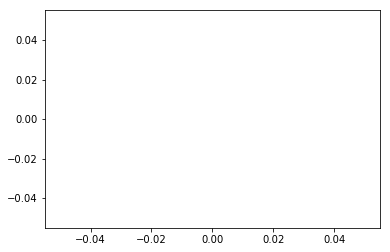

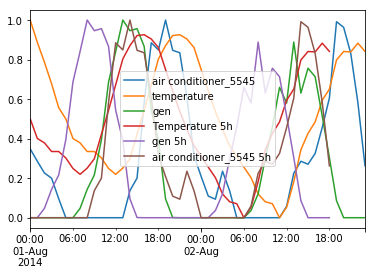

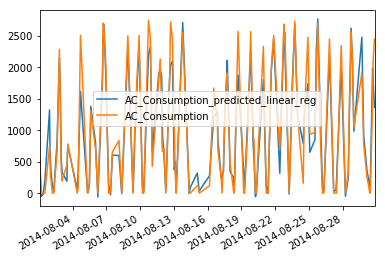

In [43]:
predicted_DF_linearReg_split_august=predicted_DF_linearReg_split["2014-08-01":"2014-08-30"]
predicted_DF_linearReg_split_august.plot()
plt.show(1)

Accuracy of the prediction

In [44]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
MAE_linearReg_split=mean_absolute_error(predicted_linearReg_split,Y_test)
MSE_linearReg_split=mean_squared_error(predicted_linearReg_split,Y_test)
R2_linearReg_split=r2_score(predicted_linearReg_split,Y_test)

The resulting value of R2 is  0.8760559202424486

The second way to make this is k-fold cross validation
It is another way of modeling data but now we need to specify the number of cross (cv)    

In [45]:
from sklearn.model_selection import cross_val_predict
predict_linearReg_CV=cross_val_predict(linear_reg,DF_features,DF_target,cv=10)

Prediction for the all data set

In [46]:
predicted_DF_linearReg_CV=pd.DataFrame(predict_linearReg_CV,index=DF_target.index,columns=["AC_Consumption_predicted_linear_reg_CV"])
predicted_DF_linearReg_CV=predicted_DF_linearReg_CV.join(DF_target)

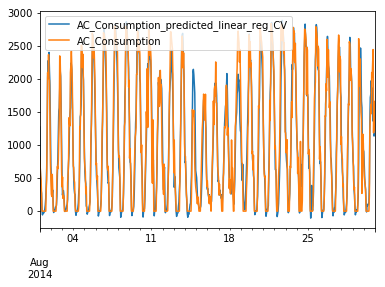

In [47]:
predicted_DF_linearReg_CV_august=predicted_DF_linearReg_CV["2014-08-01":"2014-08-30"]
plt.figure()
predicted_DF_linearReg_CV_august.plot()
plt.show(1)

Good but in the center not so much

In [48]:
MAE_linearReg_CV=mean_absolute_error(predict_linearReg_CV,DF_target)
MSE_linearReg_CV=mean_squared_error(predict_linearReg_CV,DF_target)
R2_linearReg_CV=r2_score(predict_linearReg_CV,DF_target)

The resulting R2 is  0.8760559202424486

We've improved the method because R2 now is 0.87820942328951446 instead of 0.8760559202424486 of the linear model

Random forests algorithm

In [49]:
from sklearn.ensemble import RandomForestRegressor
reg_RF=RandomForestRegressor()

In [50]:
predict_RF_CV=cross_val_predict(reg_RF,DF_features,DF_target,cv=10)
predicted_DF_RF_CV=pd.DataFrame(predict_RF_CV,index=DF_target.index,columns=["AC_Consumption_predicted_linear_reg_CV"])

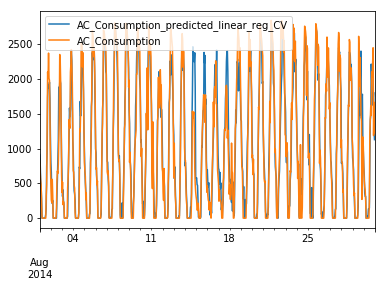

In [51]:
predicted_DF_RF_CV=predicted_DF_RF_CV.join(DF_target)
predicted_DF_RF_CV_august=predicted_DF_RF_CV["2014-08-01":"2014-08-30"]
plt.figure()
predicted_DF_RF_CV_august.plot()
plt.show()

In [52]:
MAE_RF_CV=mean_absolute_error(predict_RF_CV,DF_target)
MSE_RF_CV=mean_squared_error(predict_RF_CV,DF_target)
R2_RF_CV=r2_score(predict_RF_CV,DF_target)

The R2 value is now 0.90320500963956019

Online prediction, learn from close to now period and try to learn from the update data

In [53]:
DF_onlineConsumptionPrediction=pd.DataFrame(index=DF_mod.index)

In [54]:
period_of_training=pd.Timedelta(30,unit="d") #make a duration of 30 days
FirstTimeStamp_measured=DF_mod.index[0]                                         #1st of March
LastTimeStamp_measured=DF_mod.index[-1]                                         #Last day of September
FirstTimeStamp_toPredict=FirstTimeStamp_measured+period_of_training             #31 of March at 00:00

Now we have a period that starts from the 1 st of March and lasts till 30 day after, so the 31 th of March

We choose as a training start time the first time stamp measured in order to take more info as possible

In [55]:
training_startTimeStamp=FirstTimeStamp_measured
training_endTimeStamp=FirstTimeStamp_toPredict

It is called and because it will include this stamp, till 31 of March at 00:00 includes

In [56]:
timeStamp_toPredict=FirstTimeStamp_toPredict # from 31 of March 00:00
DF_onlineConsumptionPrediction=DF_onlineConsumptionPrediction.truncate(before=training_endTimeStamp)

We remove the data used for the training part

In [57]:
while(timeStamp_toPredict<LastTimeStamp_measured): #till the date of the value we want to predict is smaller than the last date value we measured 
    #timeStamp_toPredict=timeStamp_toPredict+pd.Timedelta(1,unit="h")
    #print timeStamp_toPredict
    #DF_features_train=DF_features.loc[training_startTimeStamp:training_endTimeStamp]
#instead of choose a period we can remove the other one
    DF_features_train=DF_features.truncate(before=training_startTimeStamp,after=training_endTimeStamp)#it deletes everything before and after the given references
    DF_target_train=DF_target.truncate(before=training_startTimeStamp,after=training_endTimeStamp)
    DF_features_test=DF_features.loc[timeStamp_toPredict].values.reshape(1,-1)#if u don t add this it could give an error because u don t have a sing\\le line of feature
    #Is the previous line taking into account the whole values or are we testing only on one value???????????????
    DF_target_test=DF_target.loc[timeStamp_toPredict]  #I choose one month for training and one hour for testing
    
    linear_reg.fit(DF_features_train,DF_target_train)  #we are creating a modul train my modul giving the input DF_features and the output DF_target
                                                    #df featurees is 14 columns of data of one month and df target is one hour 
    predicted_consumption=linear_reg.predict(DF_features_test)
    DF_onlineConsumptionPrediction.loc[timeStamp_toPredict,"Predicted"]=predicted_consumption
    DF_onlineConsumptionPrediction.loc[timeStamp_toPredict,"Real"]=DF_target_test 
    #I enlarge our data set, I don t move the starting point, but I add the real number that i have experienced

    timeStamp_toPredict=timeStamp_toPredict+pd.Timedelta(1,unit="h")
    training_endTimeStamp=training_endTimeStamp+pd.Timedelta(1,unit="h")
    #now let's move the start of training
    training_startTimeStamp=training_startTimeStamp+pd.Timedelta(1,unit="h") #window of 30 days that is moving


It's better to predict from the last values because there is a higher possibility of correlation between the values, like the correlation between temperature
In summer, if I want to predict, the modul will be more accurate if we gave it the values from the springs forgetting about the winter one

In [58]:
DF_onlineConsumptionPrediction.dropna(inplace=True)

R2_score_online_linearReg=r2_score(DF_onlineConsumptionPrediction[["Real"]],DF_onlineConsumptionPrediction[["Predicted"]])

The R2 value is now 0.91469692003650749

In [59]:
while(timeStamp_toPredict<LastTimeStamp_measured):
    #timeStamp_toPredict=timeStamp_toPredict+pd.Timedelta(1,unit="h")
    #print timeStamp_toPredict
    #DF_features_train=DF_features.loc[training_startTimeStamp:training_endTimeStamp]
#instead of choose a period we can remove the other one
    DF_features_train=DF_features.truncate(before=training_startTimeStamp,after=training_endTimeStamp)#it delete everything before and after the given references
    DF_target_train=DF_target.truncate(before=training_startTimeStamp,after=training_endTimeStamp)
    DF_features_test=DF_features.loc[timeStamp_toPredict].values.reshape(1,-1)#if u don t add this it coudl give u an error beacuse u don t have a signle line of feature
    DF_target_test=DF_target.loc[timeStamp_toPredict]  #I choose one month for training and one hour for testing
    
    reg_RF.fit(DF_features_train,DF_target_train)  #we are creating a modul train my modul giving the input DF_features and the output DF_target
                                                    #df featurees is 14 columns of data of one month and df target is one hour 
    predicted_consumption=reg_RF.predict(DF_features_test)
    DF_onlineConsumptionPrediction.loc[timeStamp_toPredict,"Predicted"]=predicted_consumption
    DF_onlineConsumptionPrediction.loc[timeStamp_toPredict,"Real"]=DF_target_test 
    #I enlarge our data set, i don t move the starting point, but i add the real number that i have experienced

    timeStamp_toPredict=timeStamp_toPredict+pd.Timedelta(1,unit="h")
    training_endTimeStamp=training_endTimeStamp+pd.Timedelta(1,unit="h")
    #now let's move the start of training
    training_startTimeStamp=training_startTimeStamp+pd.Timedelta(1,unit="h") #window of 30 days that is moving

In [60]:
DF_onlineConsumptionPrediction.dropna(inplace=True)    
R2_score_online_RF=r2_score(DF_onlineConsumptionPrediction[["Real"]],DF_onlineConsumptionPrediction[["Predicted"]])

Now R2 value is 0.98267805092981897, which is very very high and so it's an accurate model